<function matplotlib.pyplot.show(close=None, block=None)>

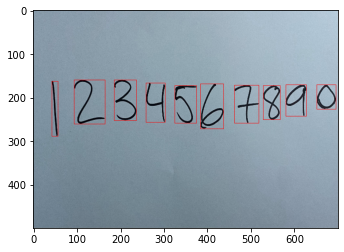

In [43]:
# Image with all digits
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

image = cv2.imread('number_test4.jpg')
image = cv2.resize(image, (700, 500))
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grey.copy(), 100, 255, cv2.THRESH_BINARY_INV)
_, contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []
x_coord = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    # Cropping digit out of image
    digit = thresh[y:y+h, x:x+w]
    
    # Check size of digit to attempt to keep extraneous markings out of data
    if(digit.size > 325):
        # Create rectangle around each digit in image to display
        cv2.rectangle(image, (x, y), (x+w, y+h), color=(255, 0, 0))
    
        # Resizing digit to 18x18 to be centered in 28x28 in image
        resized_digit = cv2.resize(digit, (18,18))
    
        # Pad digit with 5 pixels of black on each side to have digit centered in 28x28 image
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), 'constant', constant_values=0)
    
        # Appending final preprocessed digit to list
        preprocessed_digits.append(padded_digit)
        x_coord.append(x)
    
plt.imshow(image, cmap='gray')
plt.show

In [44]:
df = pd.DataFrame()
df['Preprocessed_Digits'] = preprocessed_digits
df['X_Coord'] = x_coord
df

,Preprocessed_Digits,X_Coord
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",528
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",325
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",462
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",651
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",580
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",384
6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",259
7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",43
8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",186
9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",94


In [45]:
df_1 = df.sort_values(by=['X_Coord'], ascending=True)
df_1

,Preprocessed_Digits,X_Coord
7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",43
9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",94
8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",186
6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",259
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",325
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",384
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",462
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",528
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",580
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",651


In [46]:
df_1 = df_1.reset_index(drop=True)
df_1

,Preprocessed_Digits,X_Coord
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",43
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",94
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",186
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",259
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",325
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",384
6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",462
7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",528
8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",580
9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",651


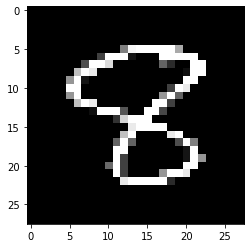

In [50]:
plt.imshow(df.Preprocessed_Digits[0], cmap='gray')
plt.show()

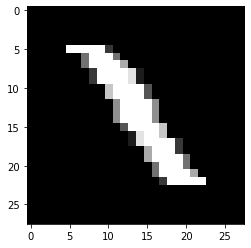

In [49]:
plt.imshow(df_1.Preprocessed_Digits[0], cmap='gray')
plt.show()